# Painting-To-Artist Image Classification Project

#### Imports

In [19]:
import os
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import preprocessor as prp
import seaborn as sns
import matplotlib.pyplot as plt
import random

#### Data Preprocessing
Change the dataset_path to the path of the dataset accordingly.

In [2]:
dataset_path = os.path.abspath(r'D:\Program Files (x86)\painting-to-artist\medium_dataset')

n = 100
ratio = 0.8
size = 128
pca_components_threshold = 0.95

x_train, x_test, y_train, y_test, le = prp.preprocess_data(dataset_path, n, ratio, size, pca_components_threshold, 'minmax')

#### Model Preferences

In [3]:
model_iterations = 50
score = 'accuracy'
seed = random.randint(0, 9999)

### KNN Model

D:\Programs\Anaconda\envs\tensorFlow\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [    nan 0.24625     nan 0.25375     nan 0.27375     nan 0.2825      nan
 0.2925      nan 0.19125     nan 0.17375     nan 0.135       nan 0.1225
     nan 0.12   ]
  warnings.warn(


Best KNN Params:    {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
Empirical Accuracy: 1.000
True Accuracy:      0.200


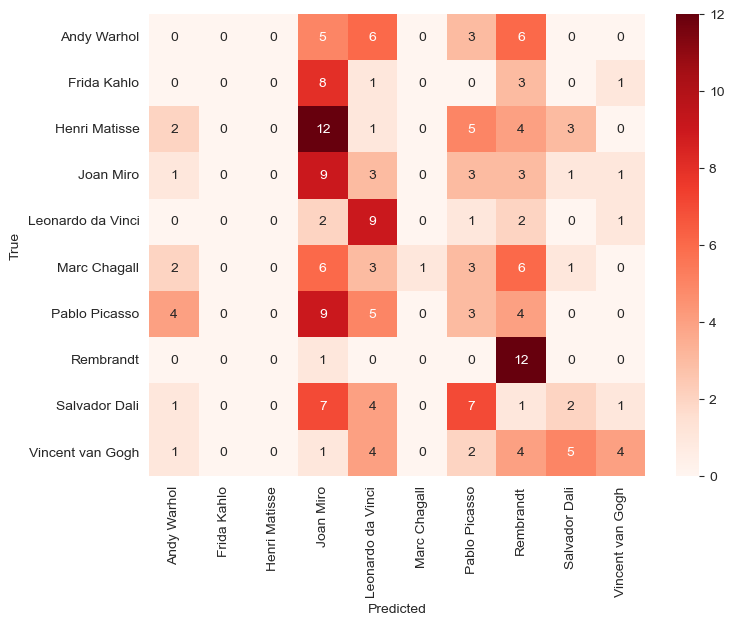

In [4]:
knn_hyperparameters = {
    'n_neighbors': [3, 5, 10, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# We create our KNN model
knn = KNeighborsClassifier(algorithm='auto')

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
knn_grid_search = GridSearchCV(estimator=knn, param_grid=knn_hyperparameters, cv=5, scoring=score, n_jobs=3)
knn_grid_search.fit(x_train, y_train)

knn_best_params = knn_grid_search.best_params_

print("Best KNN Params:    {}".format(knn_best_params))
print("Empirical Accuracy: {:.3f}".format(knn_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(knn_grid_search.score(x_test, y_test)))

knn_predictions = knn_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')

plt.savefig('knn_confusion_matrix.png', dpi=300)
plt.show()

In [24]:
# Print the classification report
print(classification_report(y_test, knn_predictions, target_names=le.classes_, zero_division=0))

                   precision    recall  f1-score   support

      Andy Warhol       0.00      0.00      1.00        20
      Frida Kahlo       1.00      0.00      0.00        13
    Henri Matisse       1.00      0.00      0.00        27
        Joan Miro       0.15      0.43      0.22        21
Leonardo da Vinci       0.25      0.60      0.35        15
     Marc Chagall       1.00      0.05      0.09        22
    Pablo Picasso       0.11      0.12      0.12        25
        Rembrandt       0.27      0.92      0.41        13
    Salvador Dali       0.17      0.09      0.11        23
 Vincent van Gogh       0.50      0.19      0.28        21

         accuracy                           0.20       200
        macro avg       0.44      0.24      0.26       200
     weighted avg       0.45      0.20      0.24       200


### Random Forest Model

Best RF Params:    {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 40}
Empirical Accuracy: 0.821
True Accuracy:      0.335


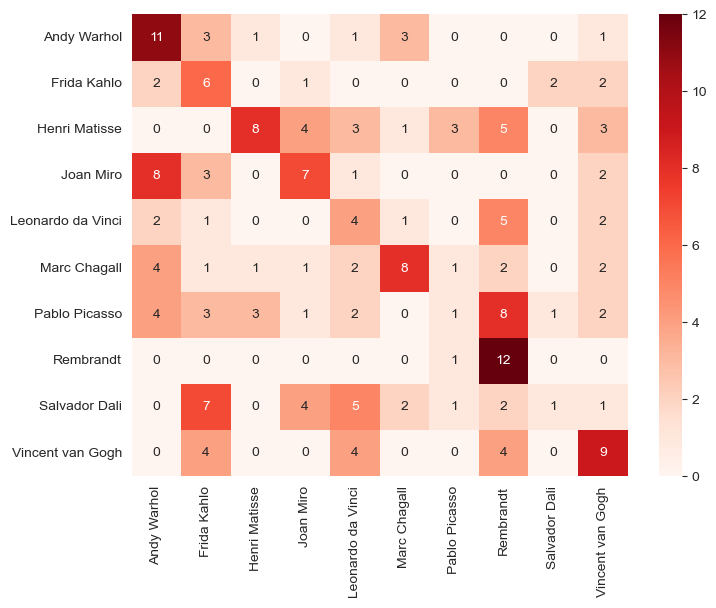

In [6]:
rf_hyperparameters = {
    'n_estimators': [20, 30, 40],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6 , 8, 10],
    'criterion': ['gini', 'entropy'],
}

# We create our Random Forest model
rf = RandomForestClassifier(random_state=seed)

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_hyperparameters, cv=5, scoring=score, n_jobs=3)
rf_grid_search.fit(x_train, y_train)

rf_best_params = rf_grid_search.best_params_

print("Best RF Params:    {}".format(rf_best_params))
print("Empirical Accuracy: {:.3f}".format(rf_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(rf_grid_search.score(x_test, y_test)))

rf_predictions = rf_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('rf_confusion_matrix.png', dpi=300)
plt.show()

In [25]:
# Print the classification report
print(classification_report(y_test, rf_predictions, target_names=le.classes_, zero_division=0))

                   precision    recall  f1-score   support

      Andy Warhol       0.35      0.55      0.43        20
      Frida Kahlo       0.21      0.46      0.29        13
    Henri Matisse       0.62      0.30      0.40        27
        Joan Miro       0.39      0.33      0.36        21
Leonardo da Vinci       0.18      0.27      0.22        15
     Marc Chagall       0.53      0.36      0.43        22
    Pablo Picasso       0.14      0.04      0.06        25
        Rembrandt       0.32      0.92      0.47        13
    Salvador Dali       0.25      0.04      0.07        23
 Vincent van Gogh       0.38      0.43      0.40        21

         accuracy                           0.34       200
        macro avg       0.34      0.37      0.31       200
     weighted avg       0.35      0.34      0.31       200


### AdaBoost Model

Best AB Params:    {'algorithm': 'SAMME.R', 'learning_rate': 0.1, 'n_estimators': 40}
Empirical Accuracy: 0.455
True Accuracy:      0.345


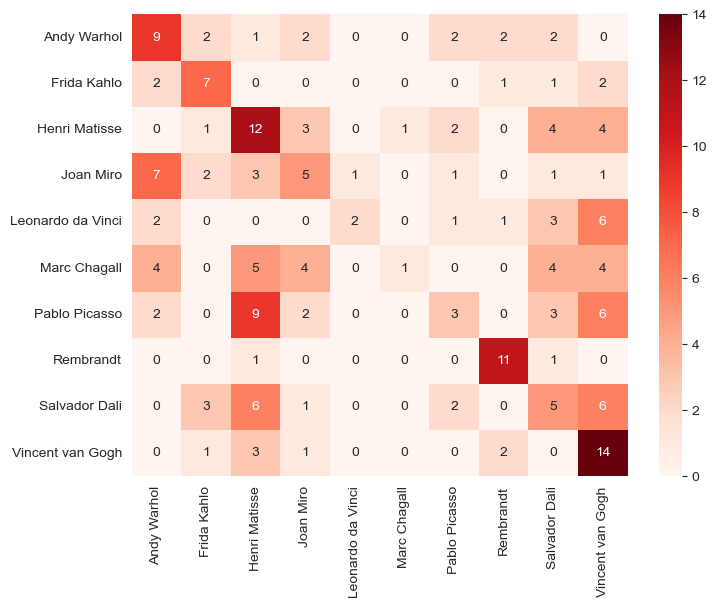

In [10]:
ab_hyperparameters = {
    'n_estimators': [40, 50, 60],
    'learning_rate': [0.1 ,0.5, 1],
    'algorithm': ['SAMME.R']
}

# We create our AdaBoost model
ab = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), random_state=seed)

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it'
ab_grid_search = GridSearchCV(estimator=ab, param_grid=ab_hyperparameters, cv=5, scoring=score, n_jobs=3)
ab_grid_search.fit(x_train, y_train)

ab_best_params = ab_grid_search.best_params_

print("Best AB Params:    {}".format(ab_best_params))
print("Empirical Accuracy: {:.3f}".format(ab_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(ab_grid_search.score(x_test, y_test)))

ab_predictions = ab_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, ab_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('ab_confusion_matrix.png', dpi=300)
plt.show()

In [26]:
# Print the classification report
print(classification_report(y_test, ab_predictions, target_names=le.classes_, zero_division=0))

                   precision    recall  f1-score   support

      Andy Warhol       0.35      0.45      0.39        20
      Frida Kahlo       0.44      0.54      0.48        13
    Henri Matisse       0.30      0.44      0.36        27
        Joan Miro       0.28      0.24      0.26        21
Leonardo da Vinci       0.67      0.13      0.22        15
     Marc Chagall       0.50      0.05      0.08        22
    Pablo Picasso       0.27      0.12      0.17        25
        Rembrandt       0.65      0.85      0.73        13
    Salvador Dali       0.21      0.22      0.21        23
 Vincent van Gogh       0.33      0.67      0.44        21

         accuracy                           0.34       200
        macro avg       0.40      0.37      0.33       200
     weighted avg       0.37      0.34      0.31       200


### SVM Model

Best SVM Params:    {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Empirical Accuracy: 1.000
True Accuracy:      0.460


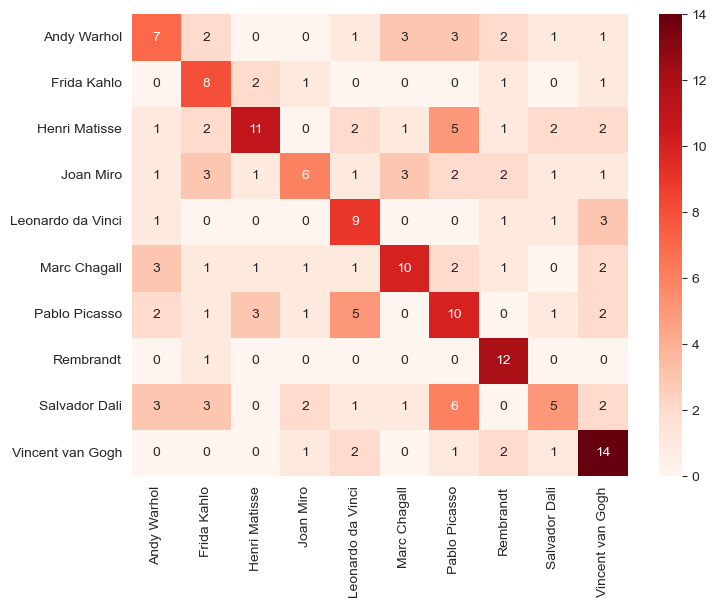

In [15]:
svm_hyperparameters = {
    'C': [0.1, 1, 10, 100], # Regularization parameter, meaning the higher the value, the more the model will overfit
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 
    'gamma': ['scale', 'auto'] # scale - 1 / (n_features * X.var()) ;  auto - 1 / n_features
}

# We create our SVM model
svm = SVC(decision_function_shape='ovo')

# Then we perform a GridSearchCV to find the best hyperparameters, on each of the times rkf splits the data and iterates over it
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_hyperparameters, cv=5, n_jobs=3)
svm_grid_search.fit(x_train, y_train)

svm_best_params = svm_grid_search.best_params_

print("Best SVM Params:    {}".format(svm_best_params))
print("Empirical Accuracy: {:.3f}".format(svm_grid_search.score(x_train, y_train)))
print("True Accuracy:      {:.3f}".format(svm_grid_search.score(x_test, y_test)))

svm_predictions = svm_grid_search.predict(x_test)

conf_mat = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap = 'Reds', fmt='g', xticklabels=le.classes_, yticklabels=le.classes_)

plt.savefig('svm_confusion_matrix.png', dpi=300)
plt.show()

In [28]:
# Print the classification report
print(classification_report(y_test, svm_predictions, target_names=le.classes_, zero_division=0))

                   precision    recall  f1-score   support

      Andy Warhol       0.39      0.35      0.37        20
      Frida Kahlo       0.38      0.62      0.47        13
    Henri Matisse       0.61      0.41      0.49        27
        Joan Miro       0.50      0.29      0.36        21
Leonardo da Vinci       0.41      0.60      0.49        15
     Marc Chagall       0.56      0.45      0.50        22
    Pablo Picasso       0.34      0.40      0.37        25
        Rembrandt       0.55      0.92      0.69        13
    Salvador Dali       0.42      0.22      0.29        23
 Vincent van Gogh       0.50      0.67      0.57        21

         accuracy                           0.46       200
        macro avg       0.47      0.49      0.46       200
     weighted avg       0.47      0.46      0.45       200


## Model Comparison

C:\Users\Barak\AppData\Local\Temp\ipykernel_2244\3825413927.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


<Figure size 1000x600 with 0 Axes>

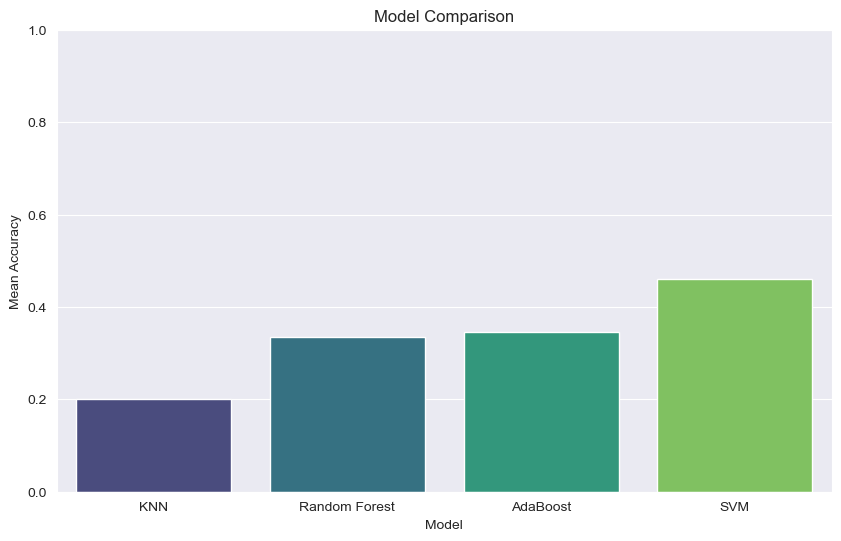

In [18]:
plt.figure(figsize=(10, 6))

models = ['KNN', 'Random Forest', 'AdaBoost', 'SVM']
accuracies = [knn_grid_search.score(x_test, y_test), rf_grid_search.score(x_test, y_test), ab_grid_search.score(x_test, y_test), svm_grid_search.score(x_test, y_test)]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.ylim(0,1)

plt.savefig('model_comparison_mean_accuracy.png', dpi=300)
plt.show()